# Comprehensive EDA Template for Categorical Target

This Jupyter notebook provides a template for performing Exploratory Data Analysis (EDA) when the target variable is categorical. It covers data loading, cleaning, visualization, and basic statistical analysis. This template is meant to be a starting point and should be adapted based on the specifics of your dataset and analysis needs.

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [24]:
def count_null(df):
    # Get the number of null values in each column
    null_counts = df.isnull().sum()
    # Get the total number of rows in the DataFrame
    total_rows = df.shape[0]
    # Compute the proportion of null values in each column
    null_proportions = null_counts / total_rows
    # Create a dictionary mapping column names to null proportions
    result = dict(zip(df.columns, null_proportions))
    return result

## Load the Dataset

In [8]:
df_path = r"C:\Users\Heng2020\OneDrive\Python Modeling\Modeling 01\Dataset Classification\08 ObesityRisk\08 ObesityRisk_train.csv"
y_name = "NObeyesdad"


folder_path = r"C:/Users/Heng2020/OneDrive/Python Modeling/Modeling 01/Code Classification/Classify 08"
model_path = r"C:/Users/Heng2020/OneDrive/Python Modeling/Modeling 01/Regression 02/Model 02.joblib"
alarm_path = r"H:\D_Music\Sound Effect positive-massive-logo.mp3"
data_ori = pd.read_csv(df_path,header=0)

In [9]:
data_ori.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [10]:
mySeed = 20
num_to_cat_col = []

n_data = 30_000

if isinstance(n_data, str) or data_ori.shape[0] < n_data :
    data = data_ori
else:
    data = data_ori.sample(n=n_data,random_state=mySeed)

In [11]:
drop_col01 = ['id']
drop_col = drop_col01
df = data.drop(drop_col,axis=1)

In [12]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


## Basic Data Overview

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             

In [15]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [21]:
df.describe(include='object')

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,20758,20758,20758,20758,20758,20758,20758,20758,20758
unique,2,2,2,4,2,2,3,5,7
top,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
freq,10422,17014,18982,17529,20513,20071,15066,16687,4046


## Data Cleaning

In [18]:
def pd_preprocess(data):
    df_cleaned = data

    return df_cleaned
df = pd_preprocess(df)

In [25]:
# Check for missing values
null_count = count_null(df)
null_count

{'Gender': 0.0,
 'Age': 0.0,
 'Height': 0.0,
 'Weight': 0.0,
 'family_history_with_overweight': 0.0,
 'FAVC': 0.0,
 'FCVC': 0.0,
 'NCP': 0.0,
 'CAEC': 0.0,
 'SMOKE': 0.0,
 'CH2O': 0.0,
 'SCC': 0.0,
 'FAF': 0.0,
 'TUE': 0.0,
 'CALC': 0.0,
 'MTRANS': 0.0,
 'NObeyesdad': 0.0}

## Univariate Analysis

### Target Variable Distribution

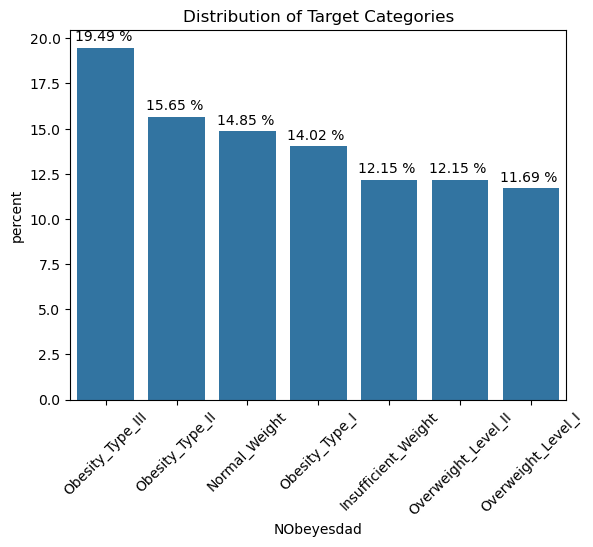

In [41]:
category_order = data[y_name].value_counts().index
sns.countplot(x=y_name, data=df,stat="percent", order=category_order)
plt.title('Distribution of Target Categories')
plt.xticks(rotation=45);

# Get the current axis
ax = plt.gca()

# Loop through each bar in the countplot
for p in ax.patches:
    # Get the height of the bar (which represents the value)
    height = p.get_height()
    # Place a text label on the bar with its height (value)
    # The first argument is the x position, which is the center of the bar (p.get_x() + p.get_width() / 2.)
    # The second argument is the y position, which is slightly above the bar (height + 0.2 for a little offset)
    # The third argument is the string to be plotted, here the height converted to integer for cleaner display
    ax.text(p.get_x() + p.get_width() / 2., height + 0.4,f'{round(height, 2)} % ' , ha='center')

plt.show()

### Numerical Features Distribution

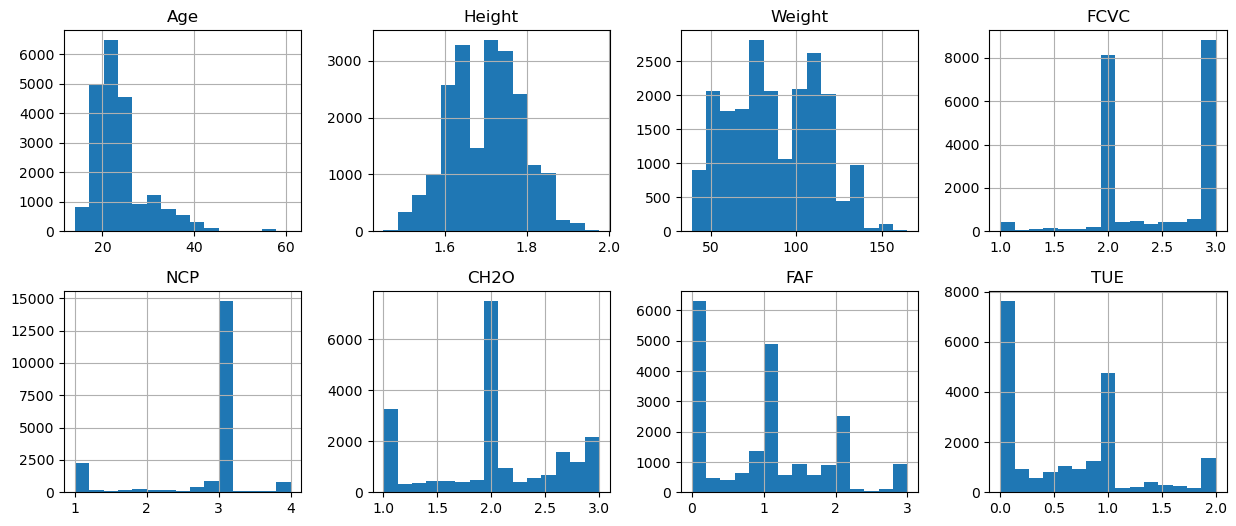

In [42]:
num_features = df.select_dtypes(include=[np.number]).columns.tolist()
df[num_features].hist(bins=15, figsize=(15, 6), layout=(2, -1))
plt.show()

In [53]:
# pair plot doesn't seem to give any insights in this dataset
# sns.pairplot(df)

### Categorical Features Distribution

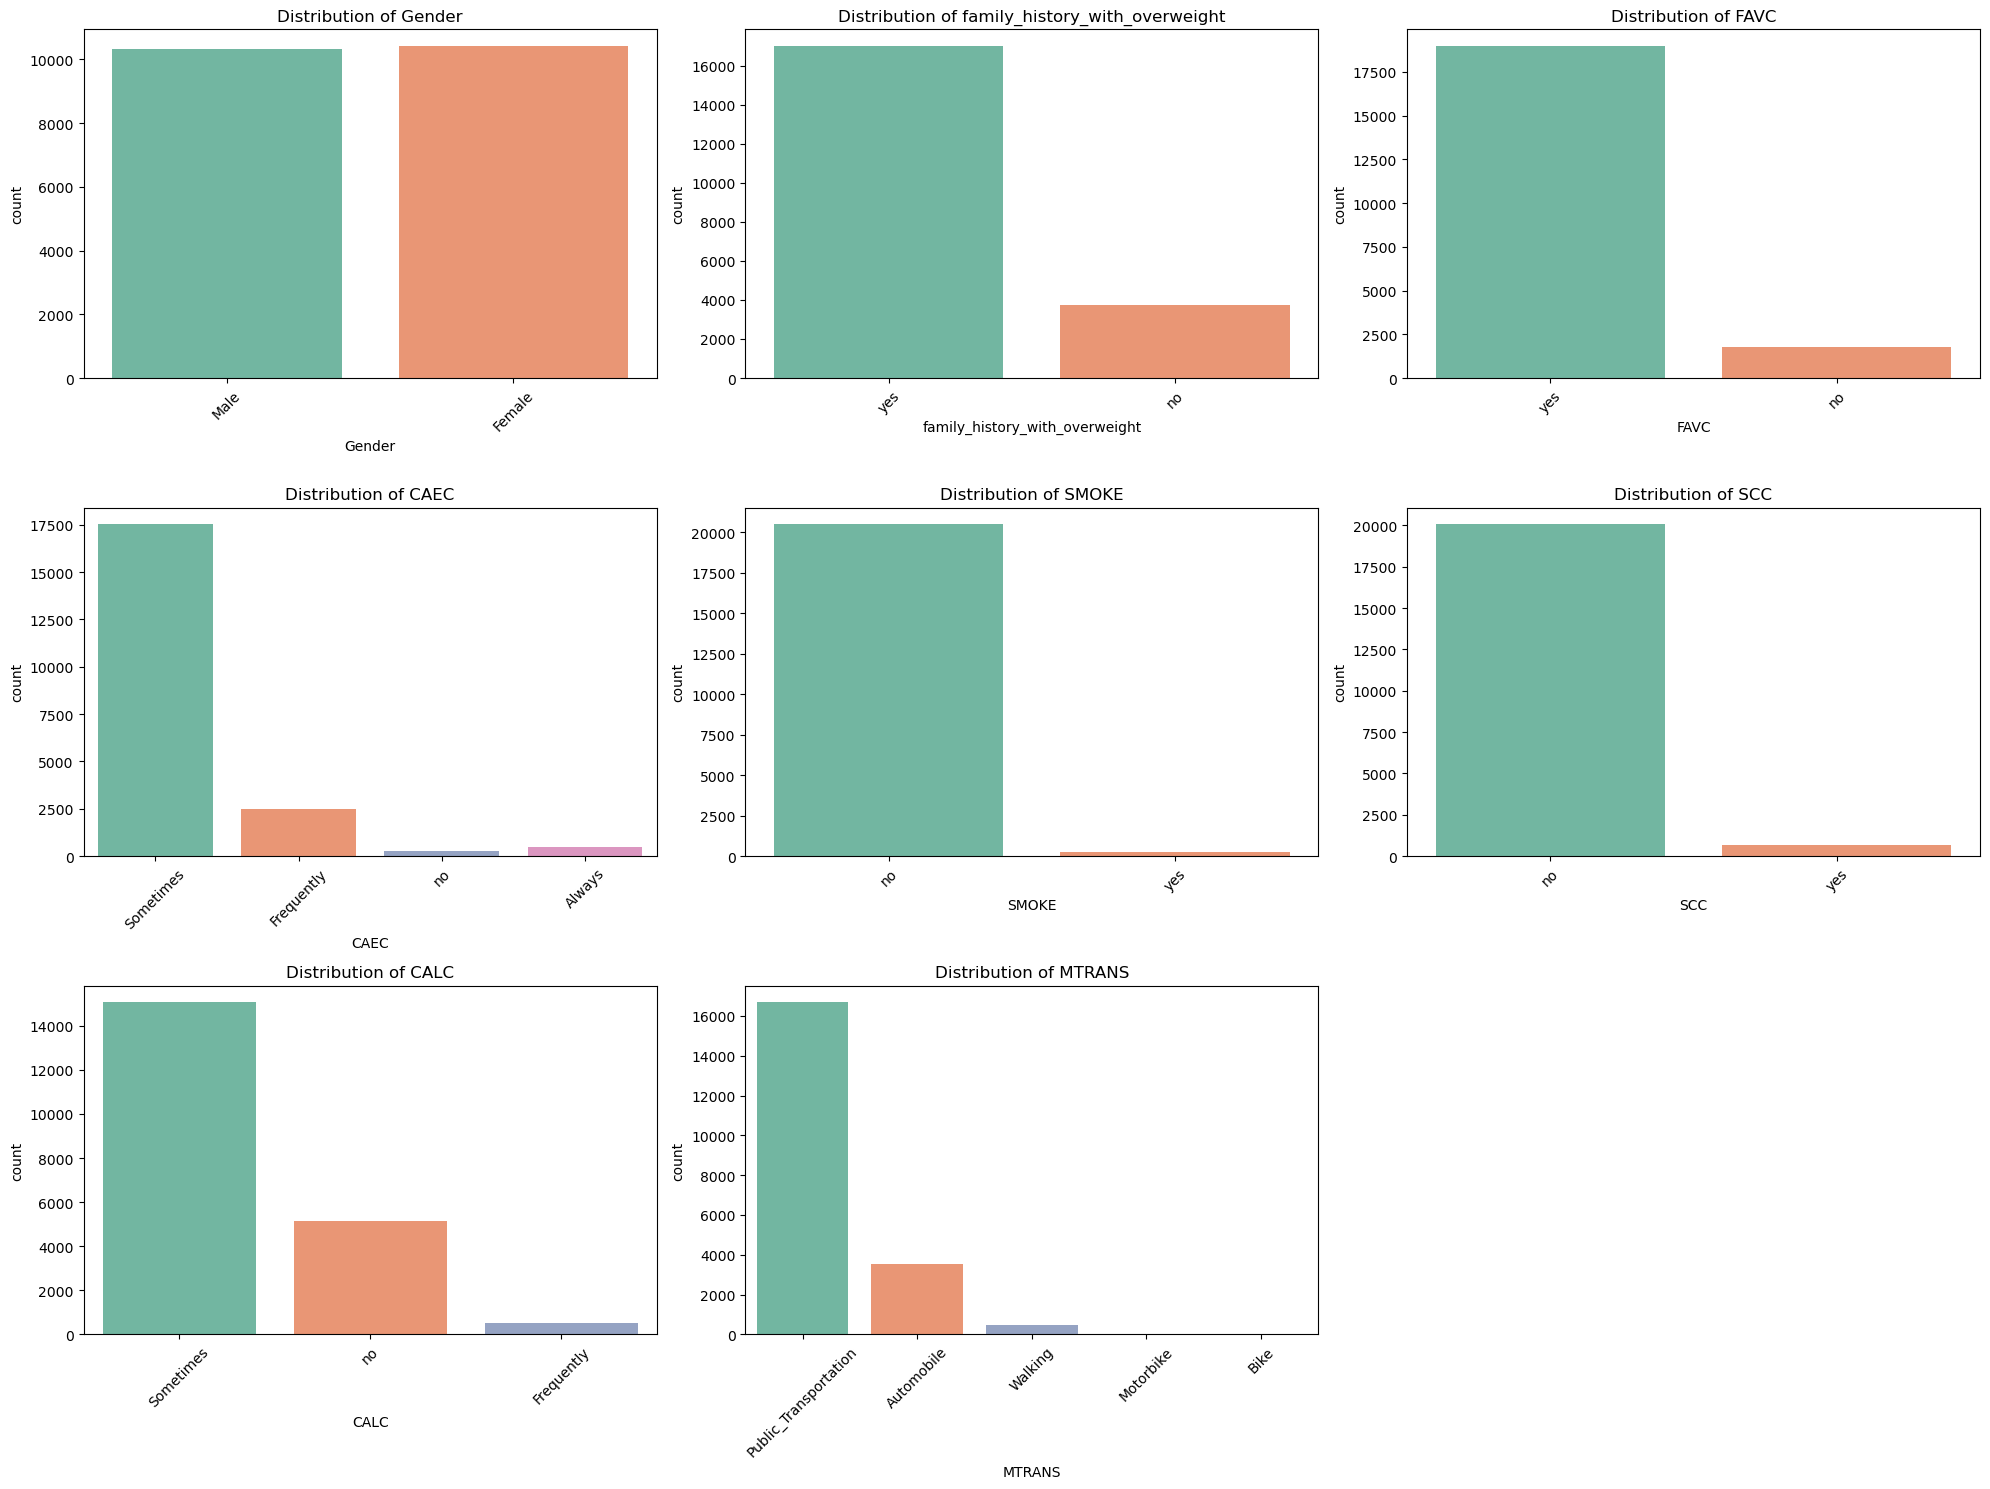

In [51]:
# Assuming 'df' is your DataFrame and 'cat_features' contains the names of your categorical features
cat_features = df.select_dtypes(include=['object']).columns.tolist()
cat_features = [col for col in cat_features if col != y_name]  # Exclude the target column

# Define the layout of the subplots
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(cat_features) + 1) // n_cols  # Calculate the required number of rows

plt.figure(figsize=(20, 5 * n_rows))  # Adjust the figure size as needed

for i, col in enumerate(cat_features, 1):  # Start enumeration from 1
    plt.subplot(n_rows, n_cols, i)  # Create subplot for each categorical feature
    sns.countplot(x=col, data=df, palette='Set2',hue=col, legend=False)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()  # Automatically adjust subplot params for a nice fit
plt.show()

## Bivariate Analysis

### Numerical Features vs Target

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_subplots(df, features, plot_func, n_cols=3, plot_size=(20, 5), **kwargs):
    """
    A generic function to create subplots for different seaborn plot types.

    Parameters:
    - df: DataFrame containing the data.
    - features: List of features (columns) to plot.
    - plot_func: Seaborn plotting function (e.g., sns.boxplot).
    - n_cols: Number of columns in the subplot grid.
    - plot_size: Tuple indicating the size of each plot.
    - **kwargs: Additional keyword arguments to pass to the plotting function.
    """
    n_rows = (len(features) + n_cols - 1) // n_cols  # Calculate the required number of rows
    fig_width, fig_height = plot_size
    plt.figure(figsize=(fig_width, fig_height * n_rows))

    for i, feature in enumerate(features, 1):
        plt.subplot(n_rows, n_cols, i)
        plot_func(data=df, **kwargs, y=feature if plot_func in [sns.boxplot, sns.violinplot] else None)
        plt.title(f'{feature} Distribution')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


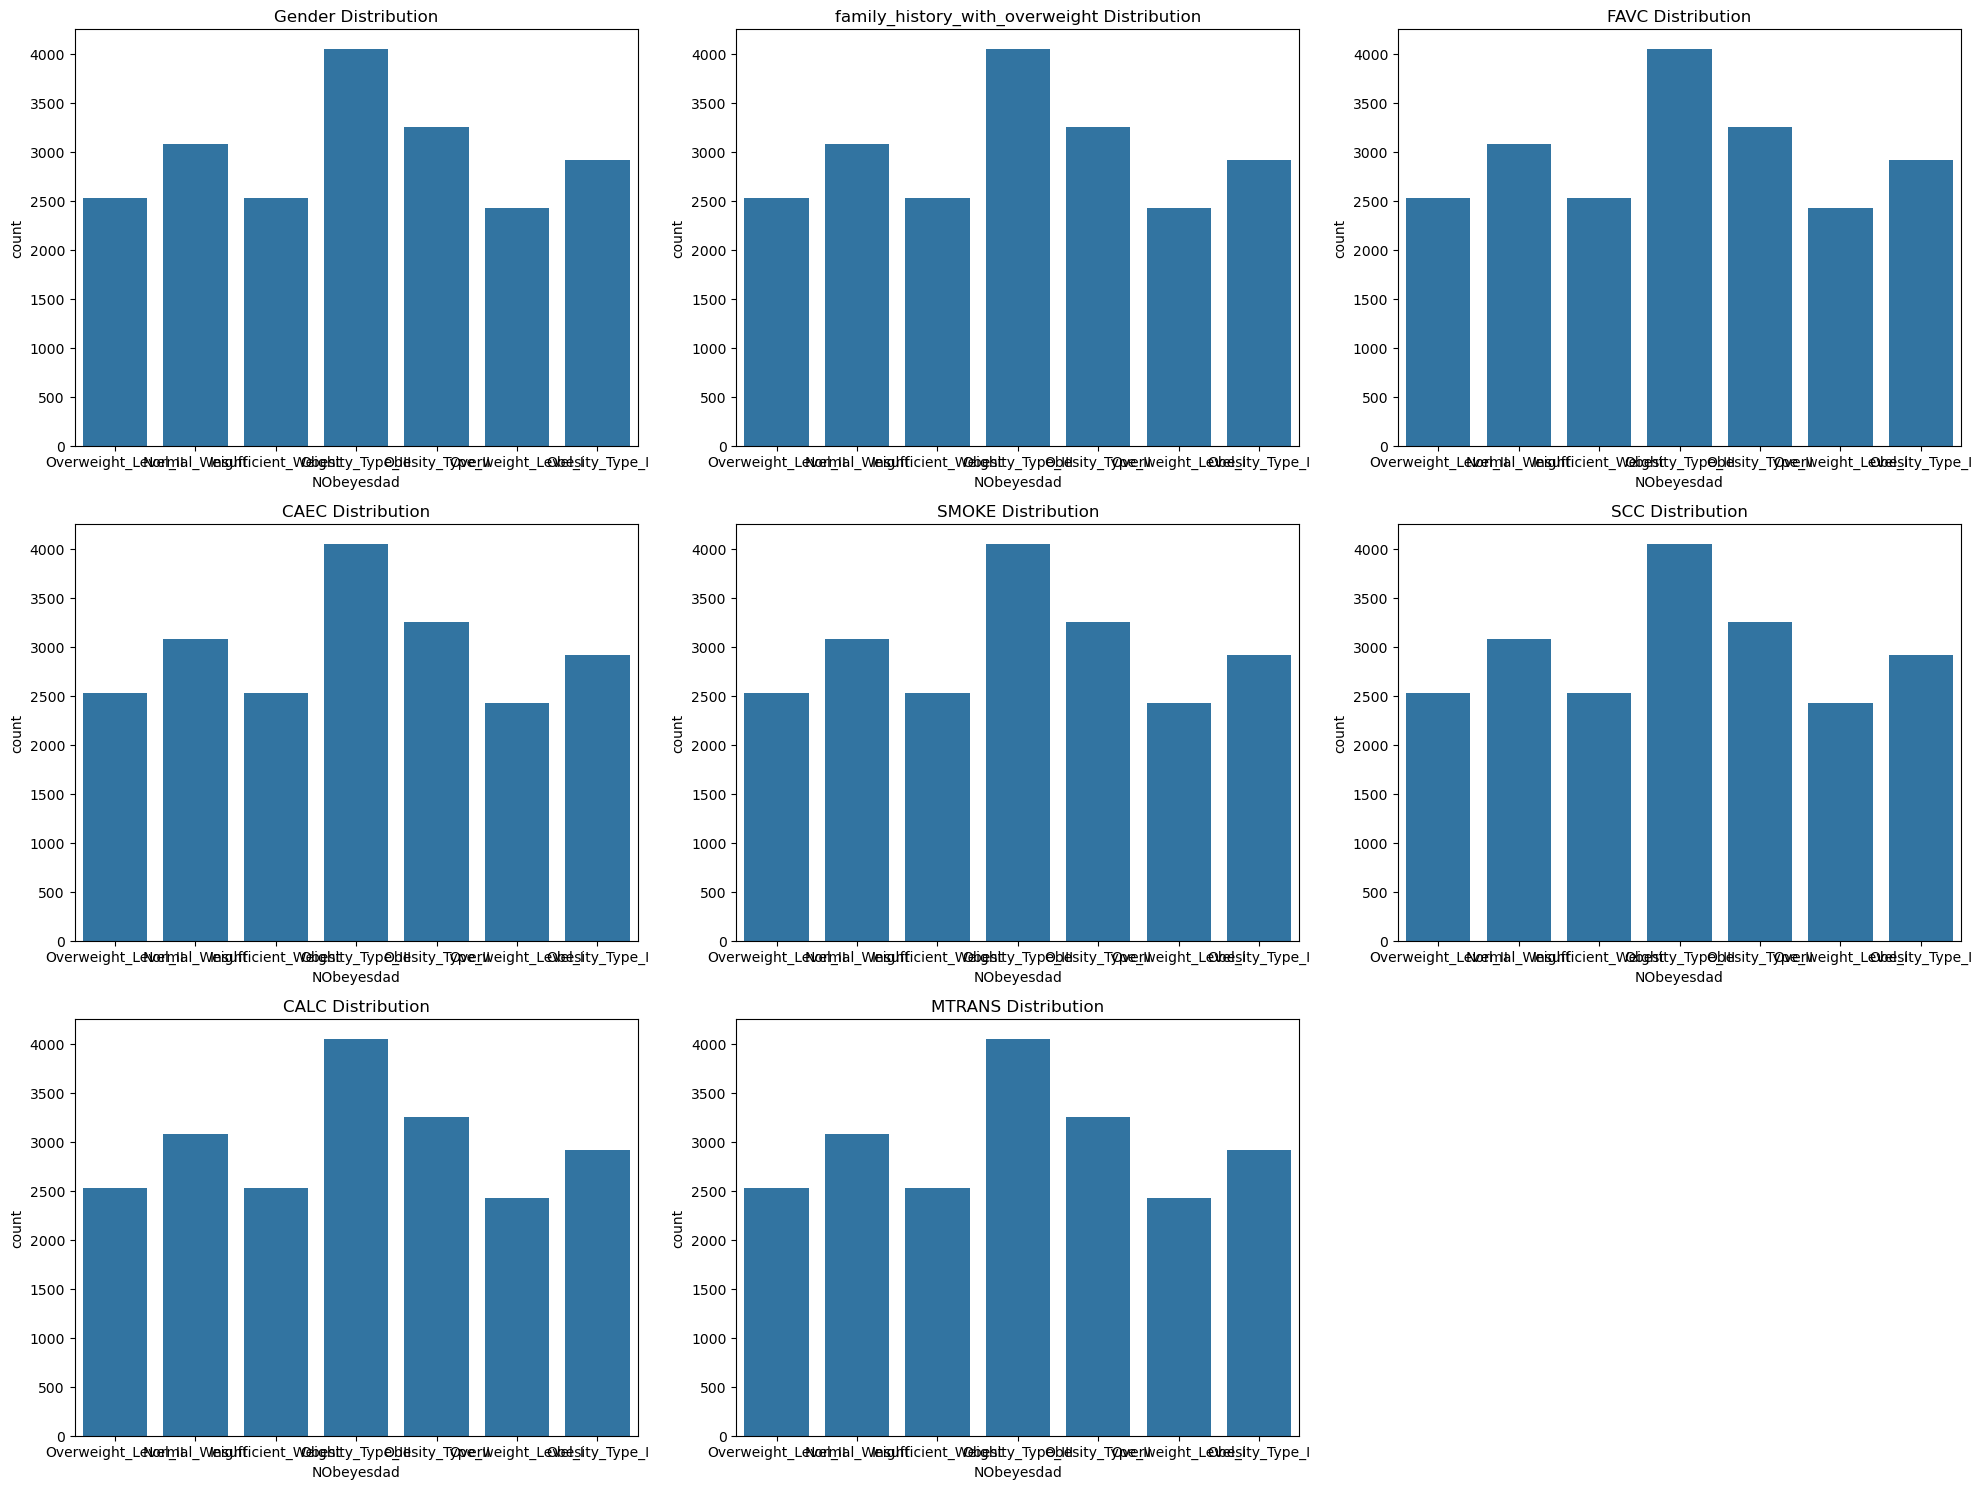

In [61]:
# plot_subplots(df, num_features, sns.boxplot,x = y_name, n_cols=3)
plot_subplots(df, cat_features, sns.countplot, n_cols=3, x= y_name)

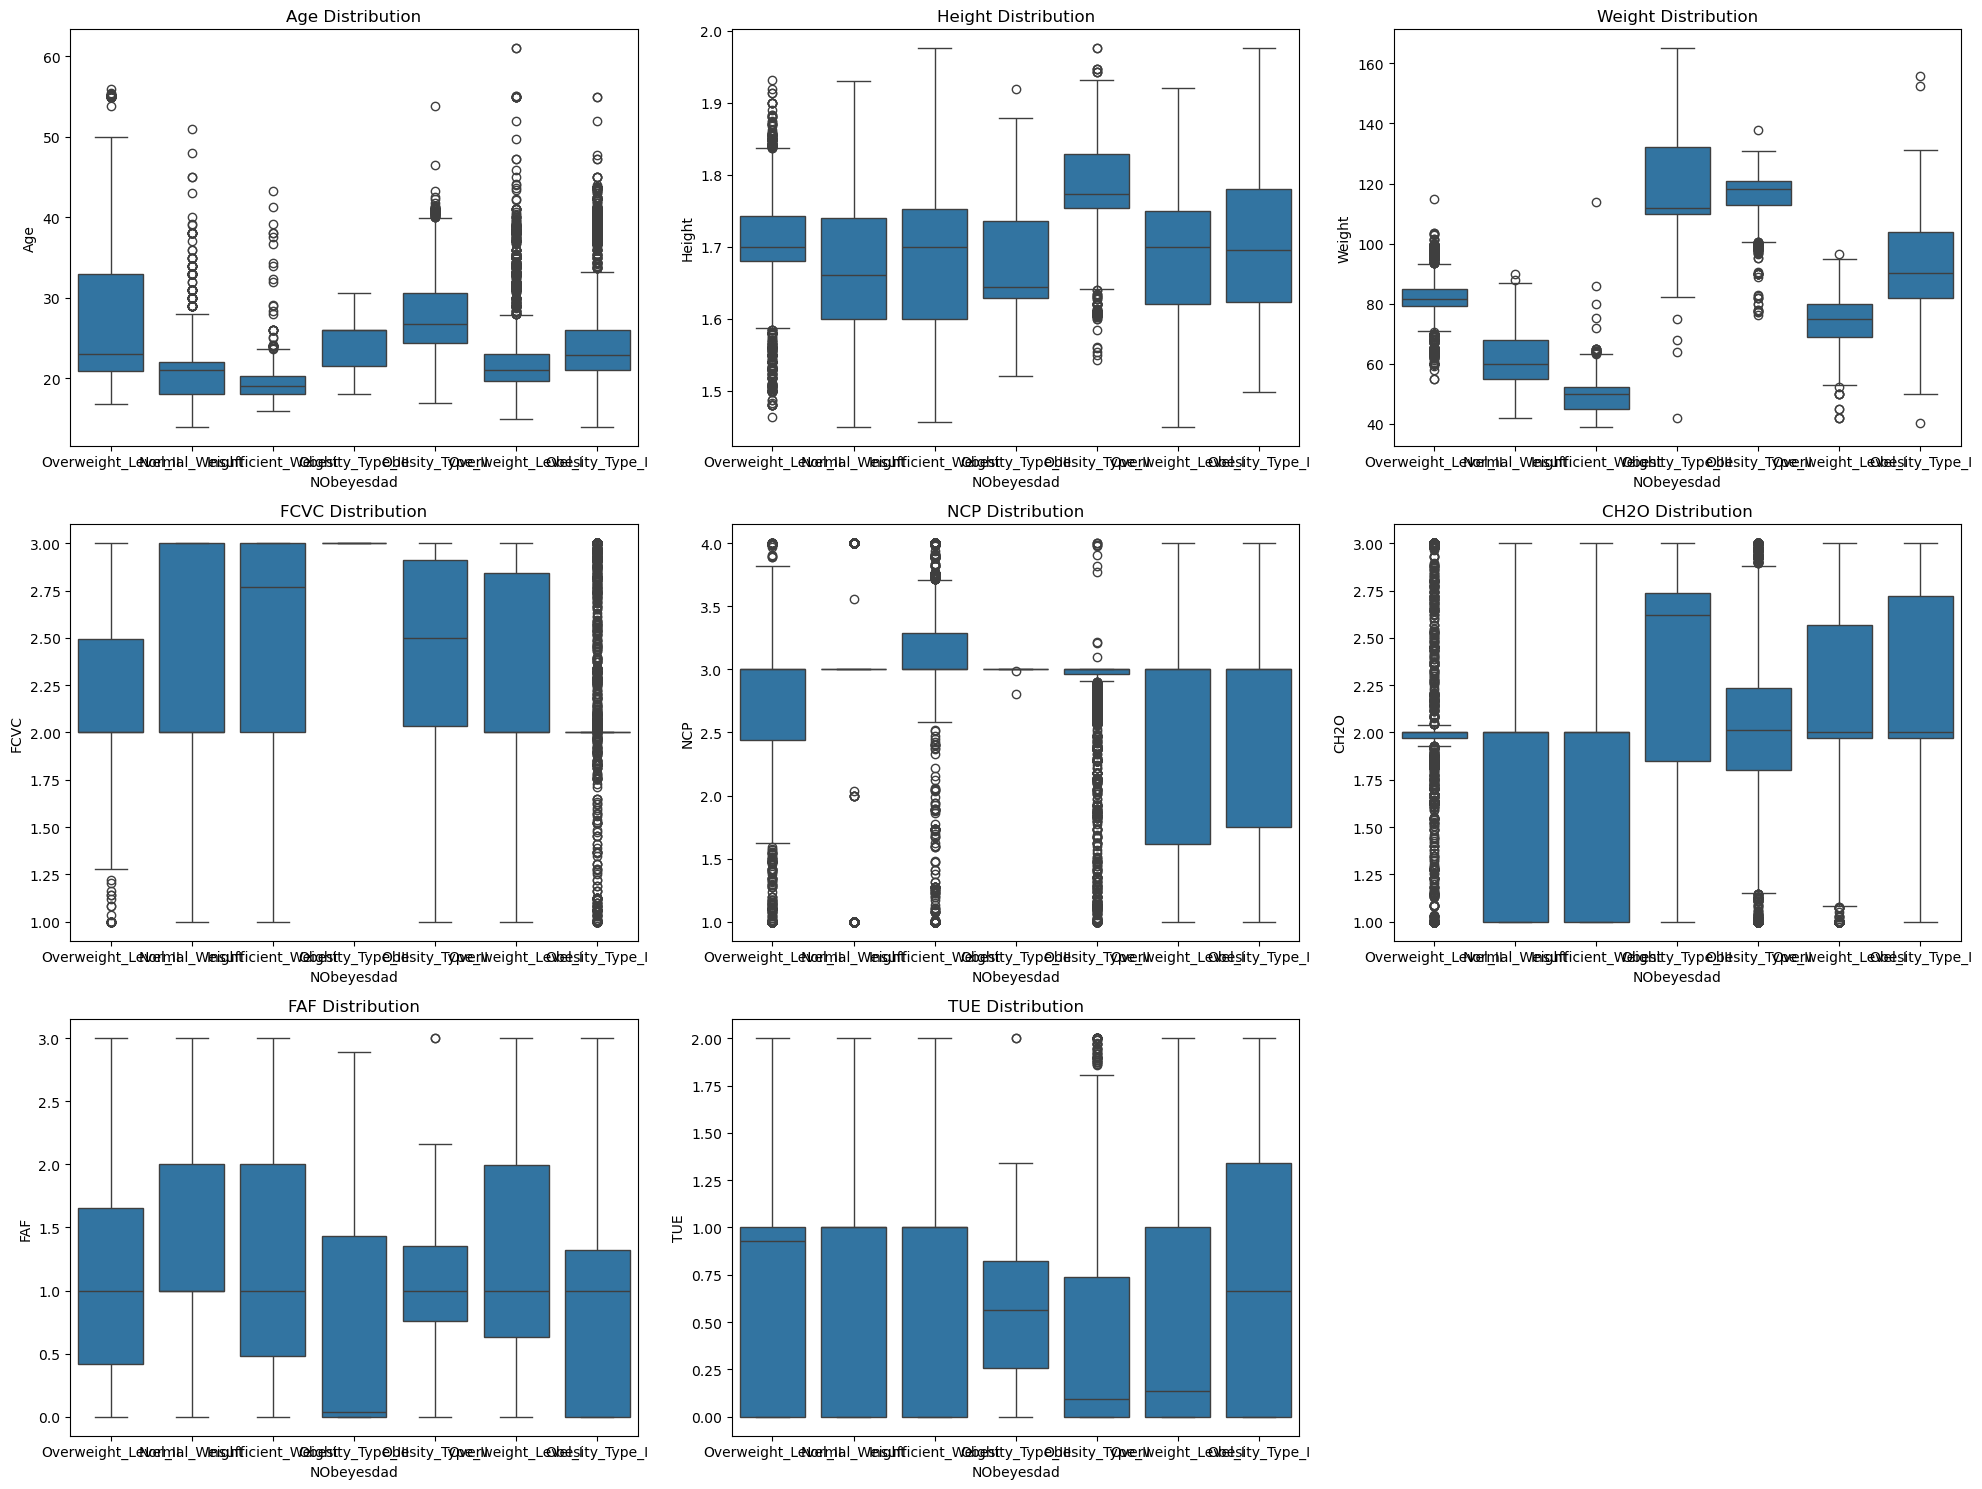

In [60]:
plot_subplots(df, num_features, sns.boxplot,x = y_name, n_cols=3)

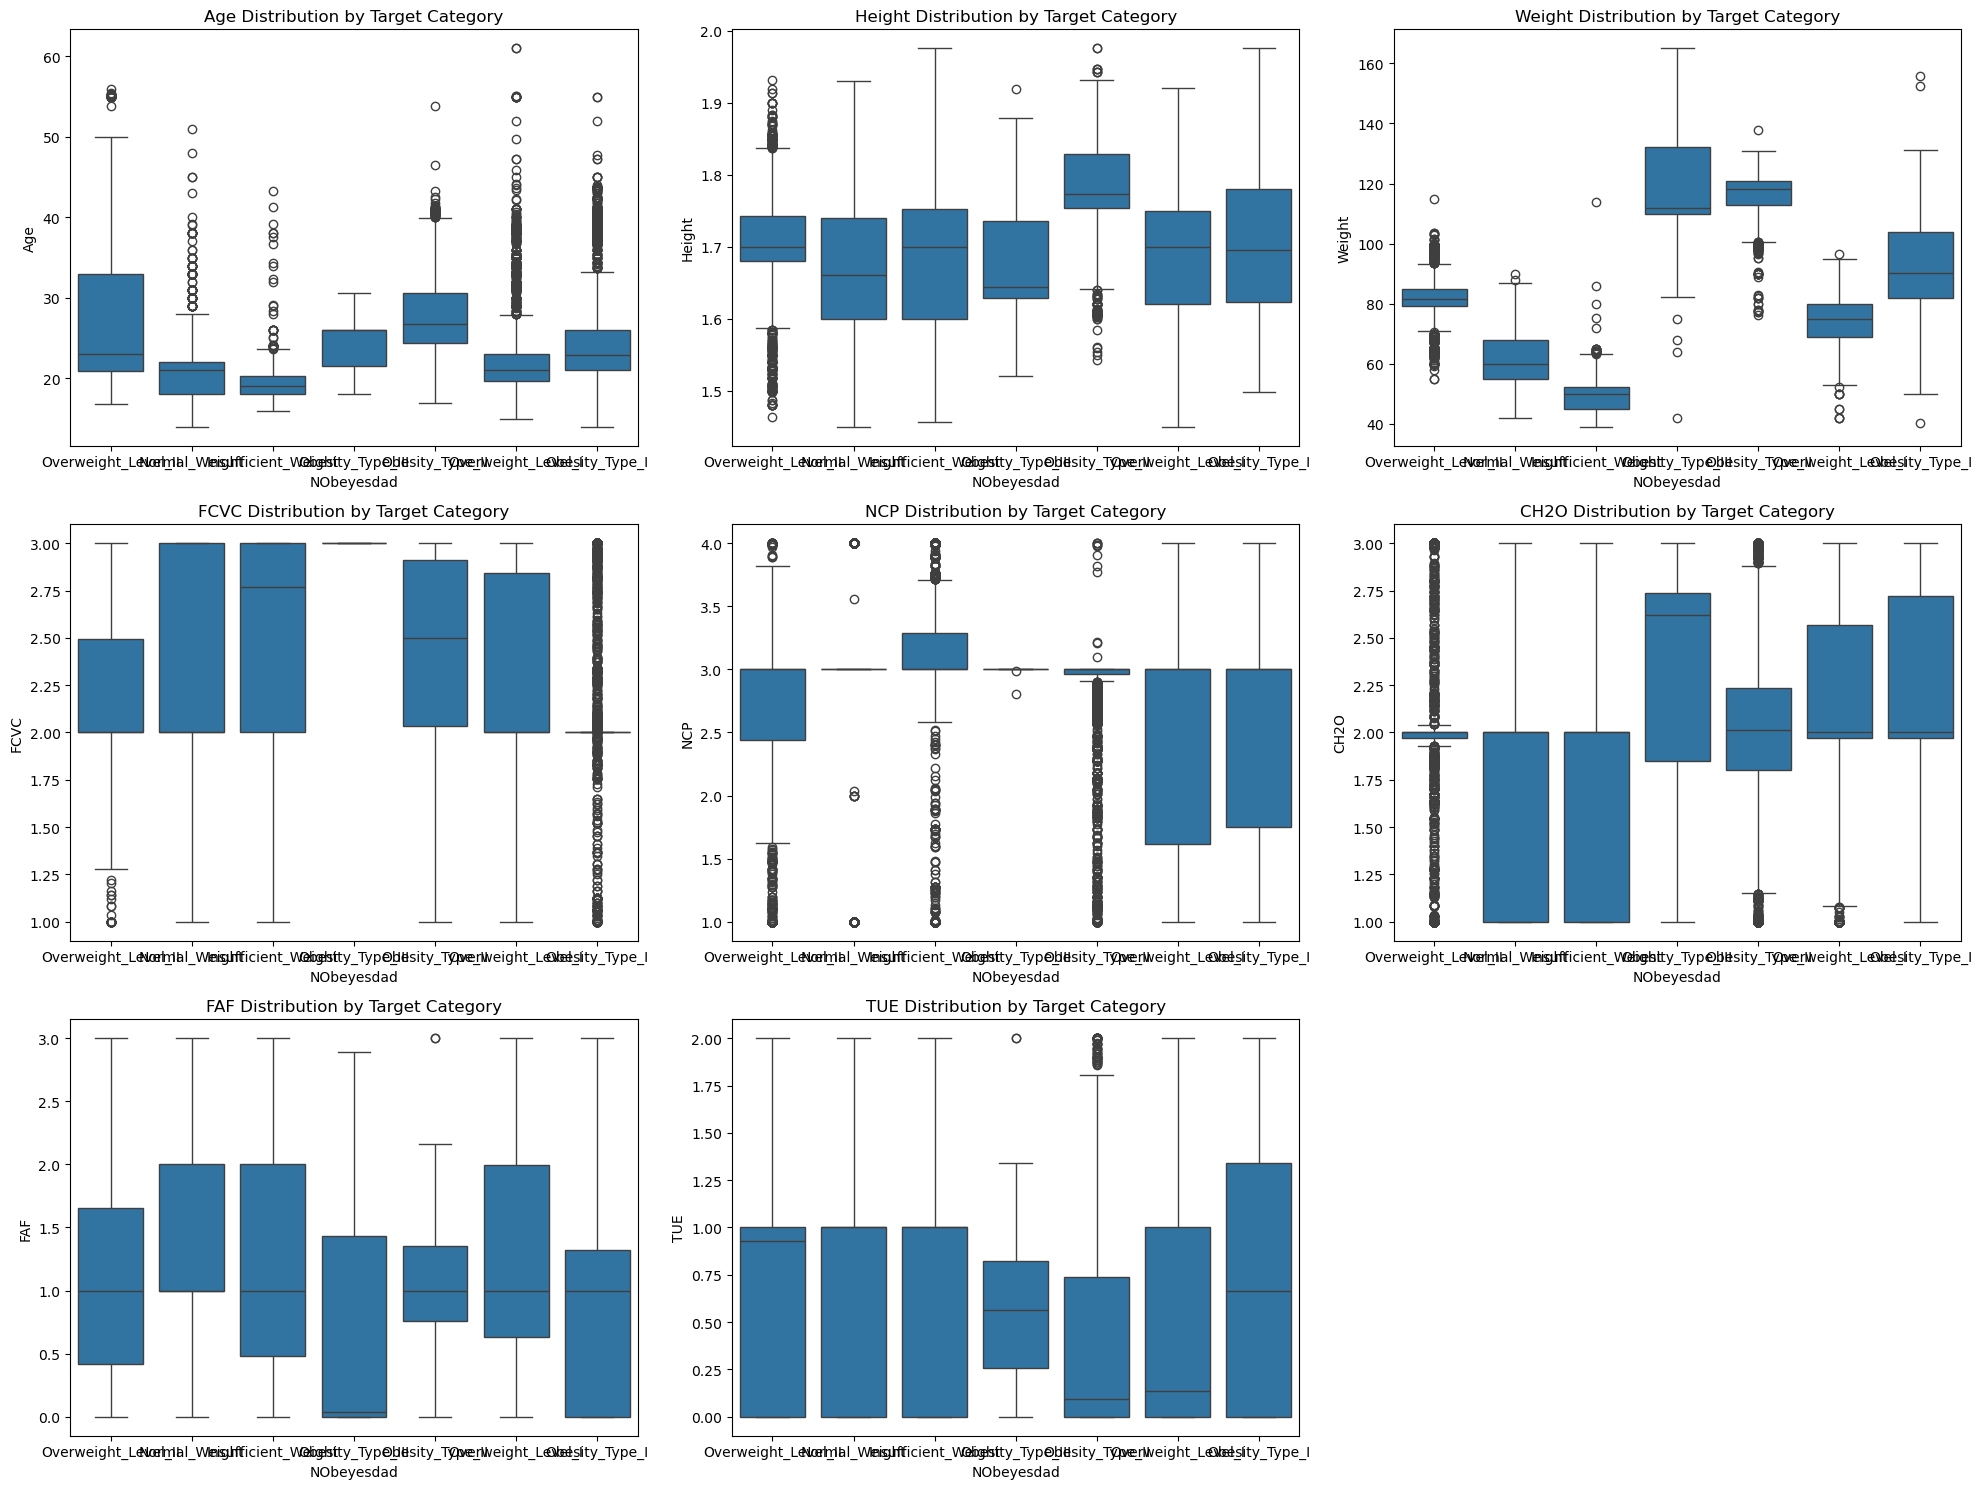

In [56]:
# Define the layout of the subplots
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(num_features) + 1) // n_cols  # Calculate the required number of rows

plt.figure(figsize=(20, 5 * n_rows))  # Adjust the figure size as needed

for i, col in enumerate(num_features, 1):
    plt.subplot(n_rows, n_cols, i)  
    sns.boxplot(x=y_name, y=col, data=df)
    plt.title(f'{col} Distribution by Target Category')

plt.tight_layout()  # Automatically adjust subplot params for a nice fit
plt.show()

### Categorical Features vs Target

In [65]:
def print_colored_text(text, color):
    from IPython.display import HTML
    display(HTML(f'<p style="color: {color};">{text}</p>'))

In [66]:
# Usage examples
print_colored_text('This text is red.', 'red')
print_colored_text('This text is blue.', 'blue')
print_colored_text('This text is green.', 'green')

In [64]:
for col in cat_features:
    if col != y_name:
        contingency_table = pd.crosstab(df[y_name], df[col])
        _, p, _, _ = chi2_contingency(contingency_table)
        print(f'{col} is significantly associated with the target variable. (p-value = {p})')

Gender is significantly associated with the target variable. (p-value = 0.0)
family_history_with_overweight is significantly associated with the target variable. (p-value = 0.0)
FAVC is significantly associated with the target variable. (p-value = 0.0)
CAEC is significantly associated with the target variable. (p-value = 0.0)
SMOKE is significantly associated with the target variable. (p-value = 6.396981747148422e-44)
SCC is significantly associated with the target variable. (p-value = 3.870102954479357e-218)
CALC is significantly associated with the target variable. (p-value = 0.0)
MTRANS is significantly associated with the target variable. (p-value = 0.0)


## Correlation Analysis

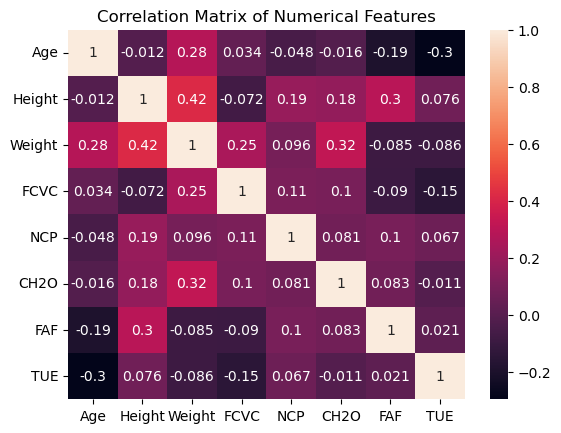

In [68]:
corr_matrix = df[num_features].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Conclusion
This template provides a starting point for EDA with a categorical target variable. Depending on your data and the specific questions you're trying to answer, you may need to add additional analysis or visualization steps.